## AI4I 2020 Predictive Maintenance

The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry.

Import required liberaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pandas_profiling import ProfileReport
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso ,RidgeCV,LassoCV , ElasticNet , ElasticNetCV, LinearRegression

Load the Dataset

In [2]:
df = pd.read_csv('ai4i2020.csv')

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [7]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## Pandas profiling for better understanding of data

In [8]:
pf = ProfileReport(df)

In [9]:
pf.to_widgets()

In [10]:
pf.to_file('test.html')

## Analysis of data

1) Air temperature and Process temperature are highly correlated( ie data is linearly ditsributed)

2) Other features like Rotational speed, torque,Tool wear are uniformly distributed.

3) Product ID and UDI are not adding any inputs to our model building.

4) We dont find any multicolinearity in the features.

5)Torque and rotational speed is inversly correlated

##  NAN Values

In [11]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

## Fequency Distribution

C:\Users\Narshinh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Air temperature [K]', ylabel='count'>

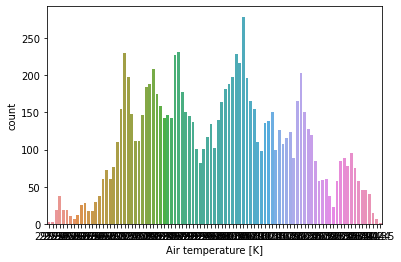

In [12]:
sns.countplot(df['Air temperature [K]'])

#### The Data is normally distributed.

## Feature Engineering

Let's drop not required columns

In [13]:
df.drop(columns=['UDI','Product ID'],inplace=True)

#### Rename columns 

In [14]:
df.rename(columns={"Air temperature [K]":"Air"}, inplace = True)
df.rename(columns={"Process temperature [K]":"Process"}, inplace = True)
df.rename(columns={"Rotational speed [rpm]":"Speed"}, inplace = True)
df.rename(columns={"Torque [Nm]":"Torque"}, inplace = True)
df.rename(columns={"Tool wear [min]":"Tool"}, inplace = True)
df.rename(columns={"Machine failure":"failure"}, inplace = True)
df.head()

,Type,Air,Process,Speed,Torque,Tool,failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


Let's map Categorical column to numeric

In [15]:
df['Type'] = df['Type'].map({'L': 0, 'M': 1,'H':2})
df.head()

,Type,Air,Process,Speed,Torque,Tool,failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Type     10000 non-null  int64  
 1   Air      10000 non-null  float64
 2   Process  10000 non-null  float64
 3   Speed    10000 non-null  int64  
 4   Torque   10000 non-null  float64
 5   Tool     10000 non-null  int64  
 6   failure  10000 non-null  int64  
 7   TWF      10000 non-null  int64  
 8   HDF      10000 non-null  int64  
 9   PWF      10000 non-null  int64  
 10  OSF      10000 non-null  int64  
 11  RNF      10000 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 937.6 KB


## Check Multicolinerity

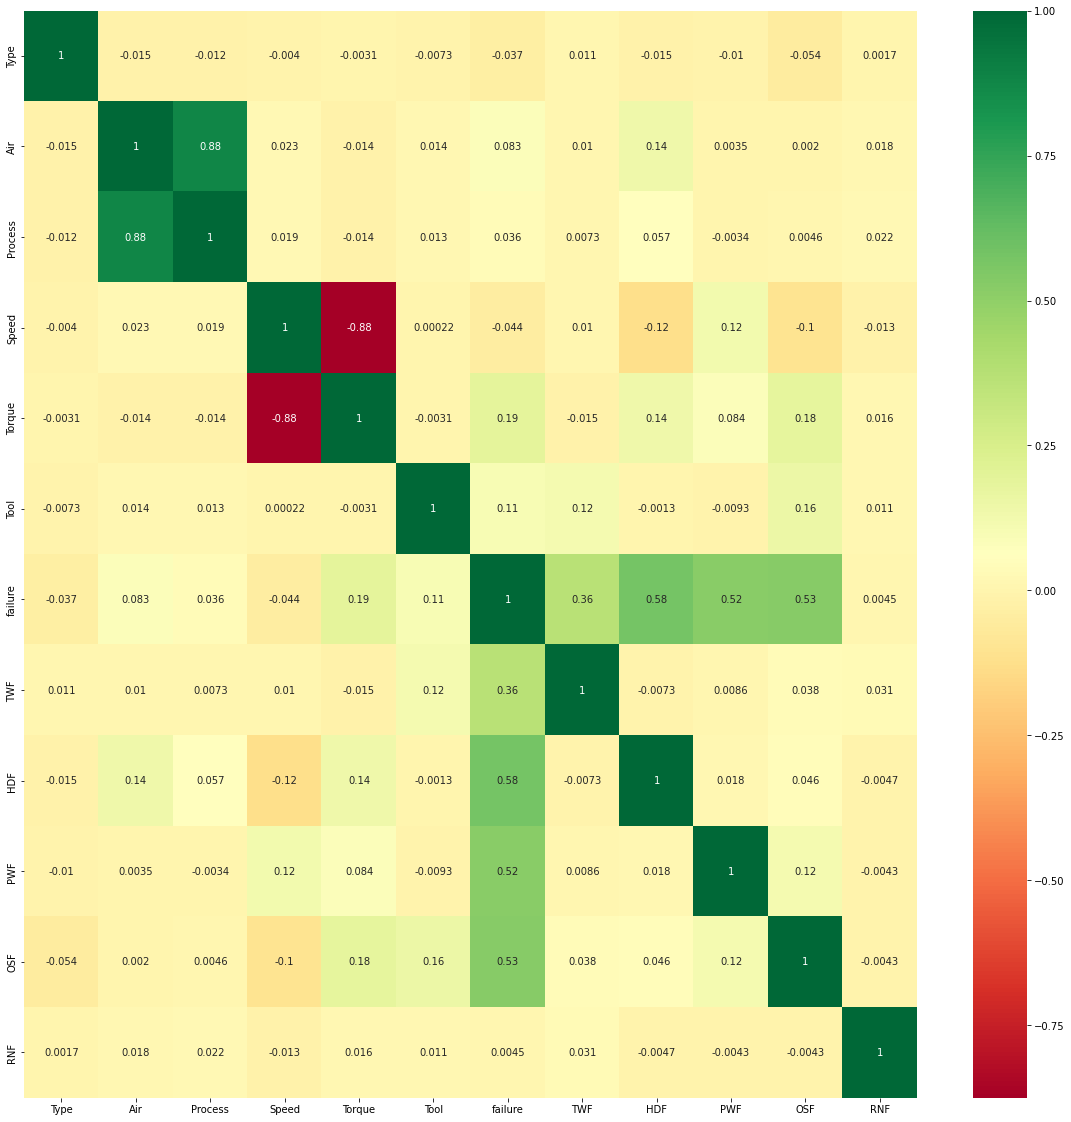

In [17]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Air ~ Process', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Air   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                 3.302e+04
Date:                Wed, 01 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:20:15   Log-Likelihood:                -13826.
No. Observations:               10000   AIC:                         2.766e+04
Df Residuals:                    9998   BIC:                         2.767e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -66.1432      2.015    -32.824      0.000     -70.093     -62.193
Process        1.1811      0.007    181.703      0.000       1.168       1.194
==============================================================================
Omnibus:                      670.862   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.880
Skew:                          -0.082   Prob(JB):                     1.10e-53
Kurtosis:                       2.253   Cond. No.                     6.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### observations:
Adj r sq and r sq are almost same and p value is less then 0.05 then we can conside process temp feature

In [19]:
df.columns

Index(['Type', 'Air', 'Process', 'Speed', 'Torque', 'Tool', 'failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [20]:
lm = smf.ols(formula='Air ~ Type+Process+Speed+Torque+Tool+failure+TWF+HDF+PWF+OSF+RNF', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Air   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     3140.
Date:                Wed, 01 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:20:16   Log-Likelihood:                -13648.
No. Observations:               10000   AIC:                         2.732e+04
Df Residuals:                    9988   BIC:                         2.741e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -64.1776      2.000    -32.092      0.000     -68.098     -60.258
Type          -0.0107      0.014     -0.754      0.451      -0.038       0.017
Process        1.1737      0.006    183.261      0.000       1.161       1.186
Speed          0.0002      0.000      1.578      0.115   -4.59e-05       0.000
Torque         0.0003      0.002      0.123      0.902      -0.004       0.005
Tool        8.454e-05      0.000      0.557      0.578      -0.000       0.000
failure       -0.0918      0.180     -0.510      0.610      -0.445       0.261
TWF            0.2048      0.219      0.937      0.349      -0.224       0.633
HDF            1.7801      0.191      9.338      0.000       1.406       2.154
PWF            0.1433      0.186      0.770      0.441      -0.221       0.508
OSF           -0.0431      0.176     -0.245      0.807      -0.388       0.302
RNF           -0.0571      0.218     -0.262      0.793      -0.484       0.370
==============================================================================
Omnibus:                      647.442   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.259
Skew:                          -0.091   Prob(JB):                     4.09e-53
Kurtosis:                       2.261   Cond. No.                     3.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### observations:
Adj r sq and r sq are mostly same and p value is less then 0.05 for only process and HDF features

In [29]:
y = df['Air']
x = df.drop(columns=['Air','Type', 'Speed', 'Torque', 'Tool', 'failure', 'TWF',
        'PWF', 'OSF', 'RNF'])
#X = df.drop(columns=['Air'])

In [30]:
scaler = StandardScaler()

In [31]:
arr = scaler.fit_transform(x)

##### VIF section

arrvif = scaler.fit_transform(X)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()

vif_df['vif'] = [variance_inflation_factor(arrvif,i) for i in range(arrvif.shape[1])]

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()

vif_df['vif'] = [variance_inflation_factor(arrvif,i) for i in range(arrvif.shape[1])]

vif_df['feature']  = X.columns

vif_df

output 
       vif	  feature
0	1.003726	Type
1	1.004920	Process
2	5.171728	Speed
3	5.236158	Torque
4	1.039958	Tool
5	11.831609	failure
6	2.433879	TWF
7	4.597163	HDF
8	3.624287	PWF
9	3.348866	OSF
10	1.002016	RNF

Failure is exceeding 10 hence it shows extreme correlation between the variables and then we need to take care of the correlation.

In [32]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

## Model Building

## Linear Regression

In [33]:
x_train, x_test, y_train,y_test = train_test_split(arr, y,test_size= 0.30,random_state = 100)

In [34]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [35]:
from sklearn.metrics import r2_score
from sklearn import metrics

print('R square:',r2_score(y_test,y_pred))
print('Adj R square:',adj_r2(x_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.7895237146421448
Adj R square: 0.7893832566605913
MAE: 0.7861141609531854
MSE: 0.8720848867389458
RMSE: 0.9338548531431133


### LASSO 

In [36]:
lassocv = LassoCV(alphas=None,cv= 50 , max_iter=200000, normalize=True)
lassocv.fit(x_train,y_train)
lassocv.alpha_
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_test)


print('R square:',r2_score(y_test,y_pred))
print('Adj R square:',adj_r2(x_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.789523379823398
Adj R square: 0.7893832566605913
MAE: 0.786116445348997
MSE: 0.872086274022878
RMSE: 0.9338555959155987


### Ridge 

In [37]:
ridgecv = RidgeCV(alphas=np.random.uniform(0,10,50),cv = 10 , normalize=True)
ridgecv.fit(x_train,y_train)
ridgecv.alpha_
ridge_lr = Ridge(alpha=ridgecv.alpha_)
ridge_lr.fit(x_train,y_train)
ridge_lr.score(x_test,y_test)
y_pred = ridge_lr.predict(x_test)

print('R square:',r2_score(y_test,y_pred))
print('Adj R square:',adj_r2(x_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.7895224498538542
Adj R square: 0.7893832566605913
MAE: 0.786126782907455
MSE: 0.872090127247401
RMSE: 0.9338576589863152


In [38]:
elastic= ElasticNetCV(alphas=None, cv = 10 )
elastic.fit(x_train,y_train)
elastic.alpha_
elastic.l1_ratio_
elastic_lr = ElasticNet(alpha=elastic.alpha_ , l1_ratio=elastic.l1_ratio_)
elastic_lr.fit(x_train,y_train)
y_pred = elastic_lr.predict(x_test)

print('R square:',r2_score(y_test,y_pred))
print('Adj R square:',adj_r2(x_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.7894452936837407
Adj R square: 0.7893832566605913
MAE: 0.7867593179235952
MSE: 0.8724098151864021
RMSE: 0.9340288085420075


In [39]:
import pickle
pickle.dump(lr,open('Linear_Regression_model.pickle','wb'))


### Test cases

In [40]:
model = pickle.load(open('Linear_Regression_model.pickle','rb'))

In [45]:
test1 = scaler.transform([[300.6,0]])
model.predict(test1)

array([289.00228364])

In [42]:
test2 = scaler.transform([[307.6,0]])
model.predict(test2)

array([297.18023876])

In [43]:
test2 = scaler.transform([[305.6,0]])
model.predict(test2)

array([294.84368016])

In [44]:
test2 = scaler.transform([[308.6,1]])
model.predict(test2)

array([299.99449811])